In [31]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def read_data(filepath):
    a_x=[]
    a_y=[]
    a_z=[]
    with open(filepath, 'rb') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            a_x.append(float(row[2]))
            a_y.append(float(row[3]))
            a_z.append(float(row[4]))
    return np.array(a_x),np.array(a_y),np.array(a_z)


0


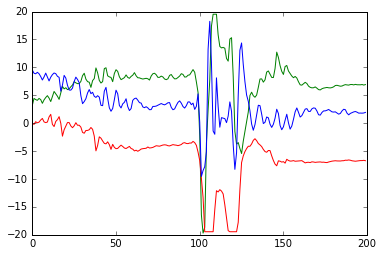

1


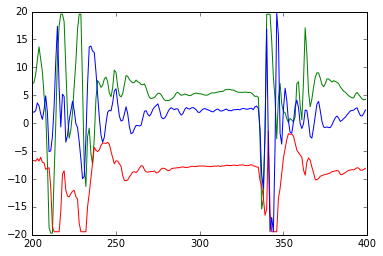

2


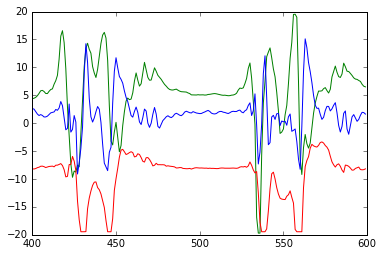

3


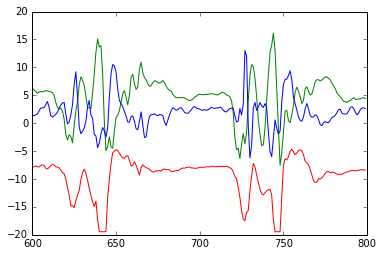

4


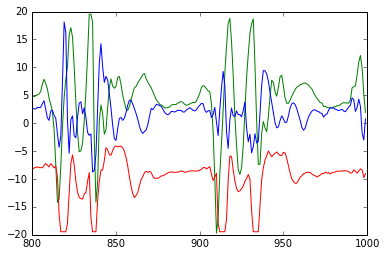

5


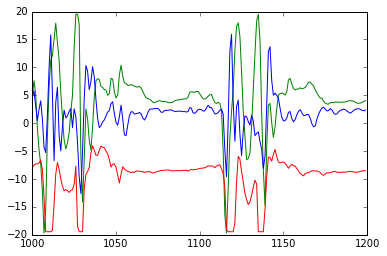

6


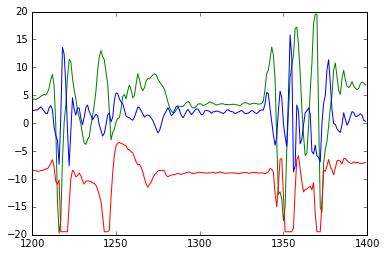

7


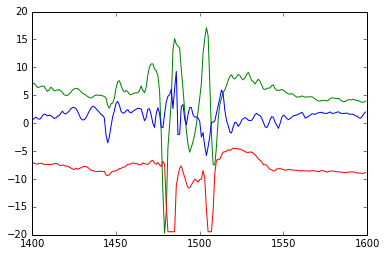

8


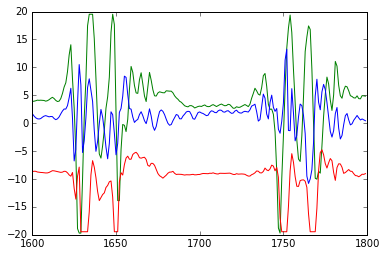

In [36]:
a_x,a_y,a_z = read_data('gestures/V.csv')
division = 200
count = 0 
s = [100,250,375,510,640,780,925,1050,1200]
e = [225,380,560,770,960,1170,1400,1600,1780,2000]
for i in range(0,len(a_x)-division,division):
    start = i
    end = i+division
    #start = s[count]
    #end = s[count]+100
    print count
    plt.plot(range(start,end),a_x[start:end],color = 'g')
    plt.plot(range(start,end),a_y[start:end],color = 'r')
    plt.plot(range(start,end),a_z[start:end],color = 'b')
    plt.show()
    count+=1

In [80]:
def add_features(feature_array,filepath, s = None):
    a_x,a_y,a_z = read_data(filepath)
    label = filepath.split('/')[1].split('.')[0]
    division = 100
    if s == None:
        for i in range(180,len(a_x)-division,division):
            start = i
            end = i+division
            acc = np.append(np.append(a_x[start:end],a_y[start:end]),a_z[start:end])
            feature_array=np.vstack([feature_array,np.append(acc,label)])
    else:
        for i in range(len(s)):
            start = s[i]
            end = start + division
            acc = np.append(np.append(a_x[start:end],a_y[start:end]),a_z[start:end])
            feature_array=np.vstack([feature_array,np.append(acc,label)])
    return feature_array

In [81]:
Data = np.zeros(301)
Data = add_features(Data,'gestures/quick_turn.csv')
s = [125,280,460,670,860,1070,1300,1500,1680,1890]
Data = add_features(Data,'gestures/arm_out.csv',s)
s = [0,175,325,475,610,750,900,1075,1270,1440,1640]
Data = add_features(Data,'gestures/across.csv',s)
s = [100,250,375,510,640,780,925,1050,1200]
Data = add_features(Data,'gestures/O.csv',s)
s = [50,175,300,400,500,600,700,790,880,980,1100,1200,1300,1450,1600,1700]
Data = add_features(Data,'gestures/V.csv',s)
s = range(50,1075,100)
Data = add_features(Data,'gestures/tap.csv',s)
Data = np.delete(Data,0,0)
Data.shape

(67, 301)

In [82]:
import pickle
with open("feature_data.pkl", 'w') as datafile:
    pickle.dump(Data, datafile)

In [53]:
import pickle
with open("feature_data.pkl", 'r') as datafile:
    Data = pickle.load(datafile)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

def Classifier_Acc(features,label,classifier = 'RandomForest'):
    '''returns the accuracy of the predicted results of the model. percent_data is the perentage 
        of the data used to create the model'''
    classifier_dict = {'RandomForest':RandomForestClassifier(),'DecisionTree':DecisionTreeClassifier(),
                       'KNeighbors':KNeighborsClassifier(n_neighbors=2),'SVC':SVC(C = 4),'NaiveBayes':GaussianNB()
                    }
    label_dict = {}
    for lab in label:
        label_dict[lab]=False
    
    accuracy = []
    for count in range(1,11):
        X_train, X_test, y_train, y_test = train_test_split(features,label,
                                                    test_size=0.50, random_state=count)
        
        #for lab in y_train:
        #    if lab in label_dict:
        #        label_dict[lab]=True
        
            
        model = classifier_dict[classifier]
        results = model.fit(X_train, y_train)

        accuracy.append(accuracy_score(results.predict(X_test),y_test))
    return np.mean(accuracy)

Classifier_Acc(Data[:,:-1],Data[:,-1])

0.7617647058823529

In [41]:
import random

def Train_Test_Split(data,numTraining=5):
    label_dict = {}
    for label in data[:,-1]:
        if label not in label_dict:
            label_dict[label]=0
    
    X_train = []
    y_train = []
    
    while (all(val==numTraining for val in label_dict.values()) == False): #loop while each label doesnt have numTraining example
        num_rows = data.shape[0]
        row = random.randint(0,num_rows-1)
        if label_dict[data[row,-1]] < numTraining: #if there are less than 5 training example with that label
            X_train.append(data[row,:-1])
            y_train.append(data[row,-1])
            label_dict[data[row,-1]]+=1
            data = np.delete(data,row,0)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = data[:,:-1]
    y_test = data[:,-1]
    
    return X_train, y_train, X_test, y_test

def model_accuracy(data,classifier = 'RandomForest', numTraining = 5):
    classifier_dict = {'RandomForest':RandomForestClassifier(),'DecisionTree':DecisionTreeClassifier(),
                       'KNeighbors':KNeighborsClassifier(n_neighbors=1,p=1),
                       'SVC':SVC(C = 4),'NaiveBayes':GaussianNB()}
    label_dict = {}
    for label in data[:,-1]:
        if label not in label_dict:
            label_dict[label]=0
    
    X_train = []
    y_train = []
    
    while (all(val==numTraining for val in label_dict.values()) == False): #loop while each label doesnt have numTraining example
        num_rows = data.shape[0]
        row = random.randint(0,num_rows-1)
        if label_dict[data[row,-1]] < numTraining: #if there are less than 5 training example with that label
            X_train.append(data[row,:-1])
            y_train.append(data[row,-1])
            label_dict[data[row,-1]]+=1
            data = np.delete(data,row,0)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = data[:,:-1]
    y_test = data[:,-1]
    
    model = classifier_dict[classifier]
    results = model.fit(X_train, y_train)
    
    return accuracy_score(results.predict(X_test),y_test)

def multi_simulation_accuracy(data,classifier = 'DecisionTree', numTraining = 5,numSimulations = 200):
    total = 0
    for i in range(numSimulations):
        total += model_accuracy(data,classifier,numTraining)
    return total/numSimulations

# def all_model_accuracies(data,numTraining = 5, numSimulations = 100):
#     d = []
#     classifiers = ['NaiveBayes','DecisionTree','SVC','RandomForest','KNeighbors']
#     for c in classifiers:
#         d.append((c,multi_simulation_accuracy(data,classifier = c,numTraining,numSimulations)))
#     return d

In [2]:
def lowpass_filter(actual_data,alpha):
    samples = 100
    filtered_data = [float(actual_data[0])]
    for i in range(1,samples):
        new_reading = alpha*float(actual_data[i-1])+(1-alpha)*filtered_data[i-1]
        filtered_data.append(new_reading)
    return filtered_data

In [3]:
def plot_gesture(Data,row,start=0,end=100):   
    plt.plot(Data[row,start:end])
    plt.plot(Data[row,(start+100):(end+100)])
    plt.plot(Data[row,(start+200):(end+200)])
    plt.show

In [4]:
def apply_lowpass_filter(Data,alpha):
    feature_array = np.zeros(301)
    for row in range(Data.shape[0]):
        ax_filtered = lowpass_filter(Data[row,:100],alpha)
        ay_filtered = lowpass_filter(Data[row,100:200],alpha)
        az_filtered = lowpass_filter(Data[row,200:300],alpha)
        acc = np.append(np.append(ax_filtered,ay_filtered),az_filtered)
        feature_array=np.vstack([feature_array,np.append(acc,Data[row,-1])])
    feature_array = np.delete(feature_array,0,0)
    return feature_array

In [21]:
Filtered_Data = apply_lowpass_filter(Data,.1)

NameError: name 'Data' is not defined

In [13]:
import pickle
with open("filtered_data.pkl", 'w') as datafile:
    pickle.dump(Filtered_Data, datafile)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def get_accel(Data,row):
    return Data[row,:100].astype(float), Data[row,100:200].astype(float), Data[row,200:300].astype(float)
   
def truncate(Data,row,beta):
    ax,ay,az = get_accel(Data,row)
    combined_std = np.sqrt(np.std(ax)**2+np.std(ay)**2+np.std(az)**2)
    threshold = beta*combined_std
    
    first_point = (ax[0],ay[0],az[0])
    start_index=0
    for i in range(1,len(ax)):
        norm = np.sqrt((ax[i]-first_point[0])**2+(ay[i]-first_point[1])**2+(az[i]-first_point[2])**2)
        if norm > threshold:
            start_index = i
            break
    
    last_point = (ax[-1],ay[-1],az[-1])
    end_index = 100
    for j in range(len(ax)-2,0,-1):
        norm = np.sqrt((ax[j]-last_point[0])**2+(ay[j]-last_point[1])**2+(az[j]-last_point[2])**2)
        if norm > threshold:
            end_index = j
            break    

    return start_index,end_index

In [7]:
plot_gesture(Filtered_Data,52)

NameError: name 'Filtered_Data' is not defined

In [7]:
s,e = truncate(Filtered_Data,52,1)
print s,e
plot_gesture(Filtered_Data,52,s,e)

NameError: name 'Filtered_Data' is not defined

In [8]:
#import math

# def interpolate(Data,row,start,end):
#     old_array = Data[row,:100].astype(float)
#     new_array = np.zeros(100)
#     for i in range(100):
#         r = i/float(100)*(end-start)+start
#         fl = int(math.floor(r))
#         cl = int(math.ceil(r))
#         if (r==fl):
#             new_array[i]=old_array[fl]
#         else:
#             new_array[i]=(r-fl)*old_array[cl]+(cl-r)*old_array[fl]
#     return new_array

In [8]:
def interpolate(Data,row,start,end):
    r = np.arange(100)
    r = r/float(100)*(end-start)+start
    ax = np.interp(r,range(start,end),Filtered_Data[row,start:end].astype(float))
    ay = np.interp(r+100,range(start+100,end+100),Filtered_Data[row,start+100:end+100].astype(float))
    az = np.interp(r+200,range(start+200,end+200),Filtered_Data[row,start+200:end+200].astype(float))
    return np.append(np.append(ax,ay),az)

In [9]:
from copy import deepcopy

def apply_truncation(Data,beta):
    truncated_data = np.zeros(301)
    for row in range(Data.shape[0]):
        start_index,end_index = truncate(Data,row,beta)
        truncated_data=np.vstack([truncated_data,np.append(interpolate(Data,row,start_index,end_index),Data[row,-1])])
    truncated_data = np.delete(truncated_data,0,0)
    return truncated_data

Trunc_Filt_Data = apply_truncation(Filtered_Data,1)
Trunc_Filt_Data.shape

NameError: name 'Filtered_Data' is not defined

In [11]:
import pickle
with open("Trunc_Filt_Data.pkl", 'w') as datafile:
    pickle.dump(Trunc_Filt_Data, datafile)

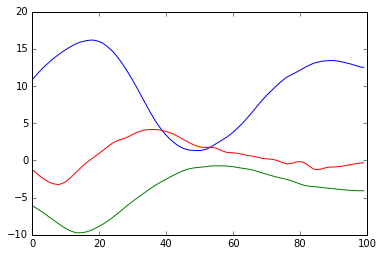

In [14]:
plot_gesture(Trunc_Filt_Data,16)

In [27]:
multi_simulation_accuracy(Trunc_Filt_Data, classifier = 'DecisionTree')

0.83148648648648693

In [189]:
def add_fft(Data,n, includeAngle = False):
    multiplier = 1 
    if includeAngle:
        multiplier = 2
    fft_features = np.zeros(n*multiplier*3+1)
    for row in range(Data.shape[0]):
        fft_x = np.fft.fft(Data[row,:100].astype(float),n)
        fft_y = np.fft.fft(Data[row,100:200].astype(float),n)
        fft_z = np.fft.fft(Data[row,200:300].astype(float),n)
        mag = np.append(np.append(np.absolute(fft_x),np.absolute(fft_y)),np.absolute(fft_z))
        if includeAngle:
            angle = np.append(np.append(np.angle(fft_x),np.angle(fft_y)),np.angle(fft_z))
            mag = np.append(mag,angle)
        fft_features=np.vstack([fft_features,np.append(mag,Data[row,-1])])
    fft_features = np.delete(fft_features,0,0)
    return fft_features

FFT_Data = add_fft(Trunc_Filt_Data,40)

In [190]:
Trunc_Filt_FFT_Data = np.append(Trunc_Filt_Data[:,:-1],FFT_Data,axis=1)

In [191]:
import pickle
with open("Trunc_Filt_Data_FFT.pkl", 'w') as datafile:
    pickle.dump(Trunc_Filt_FFT_Data, datafile)

In [39]:
import pickle
with open("Trunc_Filt_Data1.pkl", 'r') as datafile:
    Trunc_Filt_Data = pickle.load(datafile)

In [11]:
#import mlpy
from sklearn.neighbors import DistanceMetric

def dtw_distance(x,y):
    distances = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            distances[i,j] = (x[j]-y[i])**2 
    accumulated_cost = np.zeros((len(y), len(x)))
    accumulated_cost[0,0] = distances[0,0]
    for i in range(1, len(x)):
        accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]
    for i in range(1, len(y)):
        accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0] 
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], 
                                               accumulated_cost[i-1, j], 
                                               accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], 
                                                 accumulated_cost[i-1, j], 
                                                 accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [y, x] in path:
        cost = cost +distances[x, y]
    return cost 
    
    
def distance_metric(gesture1,gesture2):
    gesture1 = gesture1.astype(float)
    gesture2 = gesture2.astype(float)
    dist_x = dtw_distance(gesture1[:100], gesture2[:100])
    dist_y = dtw_distance(gesture1[100:200], gesture2[100:200])
    dist_z = dtw_distance(gesture1[200:300], gesture2[200:300])
    return np.sum(np.square(np.array([dist_x,dist_y,dist_z])))

#dtw=DistanceMetric.get_metric('pyfunc',func=distance_metric)

#distance_metric(Trunc_Filt_Data[52,:-1],Trunc_Filt_Data[53,:-1])



In [12]:
def custom_KNN(data,n=1):
    label_dict = {}
    for label in data[:,-1]:
        if label not in label_dict:
            label_dict[label]=0
    
    X_train = []
    y_train = []
    
    while (all(val==1 for val in label_dict.values()) == False): #loop while each label doesnt have numTraining example
        num_rows = data.shape[0]
        row = random.randint(0,num_rows-1)
        if label_dict[data[row,-1]] < 1: #if there are less than 5 training example with that label
            X_train.append(data[row,:-1])
            y_train.append(data[row,-1])
            label_dict[data[row,-1]]+=1
            data = np.delete(data,row,0)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = data[:,:-1]
    y_test = data[:,-1]
    
    labels = []
    for test_index,test in enumerate(X_test):
        distances = []
        for train_index,train in enumerate(X_train):
            distances.append((distance_metric(test,train),y_train[train_index]))
        labels.append(min(distances)[1])    
    print len(labels)
        
    return accuracy_score(labels,y_test)

custom_KNN(Trunc_Filt_Data)


61


0.95081967213114749

In [13]:
multi_simulation_accuracy(Trunc_Filt_Data,classifier = 'KNeighbors',numTraining = 1)

0.91877049180327797

In [15]:
import timeit

def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

def KNN_predict(X_test):
    minimum = 0 
    for train_index,train in enumerate(X_train):
        minumum = min(minimum,distance_metric(X_test,train)*-1)
    return minimum*-1

In [16]:
X_train, y_train, X_test, y_test = Train_Test_Split(Trunc_Filt_Data,numTraining = 3)

model = KNeighborsClassifier(n_neighbors=1)
results = model.fit(X_train, y_train)
 
wrapped = wrapper(results.predict,X_test[0].reshape(1,-1))
print timeit.timeit(wrapped, number=1)

model = DecisionTreeClassifier()
results = model.fit(X_train, y_train)

print timeit.timeit(wrapped, number=1)

model = RandomForestClassifier()
results = model.fit(X_train, y_train)

print timeit.timeit(wrapped, number=1)

wrapped = wrapper(KNN_predict,X_test[0])

print timeit.timeit(wrapped, number=1)

0.000617027282715
0.00220990180969
0.00054407119751
0.719120025635


In [ ]:
import socket, traceback

host = ''
port = 5555

s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
s.setsockopt(socket.SOL_SOCKET, socket.SO_BROADCAST, 1)
s.bind((host, port))

while 1:
    try:
        message, address = s.recvfrom(8192)
        print (message)
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        traceback.print_exc()

In [37]:
import socket, traceback
 
 
 
host = ''
port = 50000
 
s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
s.setsockopt(socket.SOL_SOCKET, socket.SO_BROADCAST, 1)
s.bind((host, port))
 
#used for debugging
 
print("Success binding")
while 1:
    message, address = s.recvfrom(8192)
    messageString = message.decode("utf-8")
    print(messageString.split[2])      
     
     
# Example of XML data received:
# <Node Id>node12</Node Id>
# <GPS>
# <Latitude>1.123123</Latitude>
# <Longitude>234.1231231</Longitude>
# <Accuracy>40.0</Accuracy>
# </GPS>
# <Accelerometer>
# <Accelerometer1>0.38444442222</Accelerometer1>
# <Accelerometer2>0.03799999939</Accelerometer2>
# <Accelerometer3>9.19400000331</Accelerometer3>
# </Accelerometer>
# <TimeStamp>1370354489083</TimeStamp>

Success binding


KeyboardInterrupt: 

In [46]:
multi_simulation_accuracy(Trunc_Filt_Data,classifier = 'KNeighbors',numTraining = 2)

0.96936363636363621

In [69]:
def find_distance(Data1,Data2):
    distances = []
    for i in range(Data1.shape[0]):
        for j in range(Data2.shape[0]):
            if Data1[i,-1]==Data2[j,-1]:
                dist = np.sum(np.absolute(np.subtract(Data1[i,:-1].astype(float),Data2[j,:-1].astype(float))))
                distances.append((dist,Data1[i,-1],Data2[j,-1]))
    return sorted(distances,reverse = True)
            

In [83]:
x = np.arange(10)
print x
x = np.roll(x[:3],-1)
print x 
x[-1]=5
print x


[0 1 2 3 4 5 6 7 8 9]
[1 2 0]
[1 2 5]


In [93]:
Training_Gestures,Training_Labels,_,_ = Train_Test_Split(Trunc_Filt_Data,numTraining = 1)

In [128]:
def start_stream(gestures,filepath):
    signal_x = np.zeros(100)
    signal_y = np.zeros(100)
    signal_z = np.zeros(100)
    gestures[:,:-1]=gestures[:,:-1].astype(float)
    
    with open(filepath, 'rb') as f:
        reader = csv.reader(f, delimiter=',')
        count = 0 
        for row in reader:
            if count == 0:
    
                signal_x = np.roll(signal_x,-1)
                signal_y = np.roll(signal_y,-1)
                signal_z = np.roll(signal_z,-1)

                signal_x[-1]=float(row[2])
                signal_y[-1]=float(row[3])
                signal_z[-1]=float(row[4])

            else:
                
                signal_x = np.roll(signal_x,-1)
                signal_y = np.roll(signal_y,-1)
                signal_z = np.roll(signal_z,-1)
                
                #apply low pass filter
                signal_x[-1]=.1*float(row[2])+.9*signal_x[-2] #apply low pass filter
                signal_y[-1]=.1*float(row[3])+.9*signal_y[-2]
                signal_z[-1]=.1*float(row[4])+.9*signal_z[-2]
                
                if count > 100:
                    #find truncation indices
                    combined_std = np.sqrt(np.std(signal_x)**2+np.std(signal_y)**2+np.std(signal_z)**2)
                    threshold = 1*combined_std

                    first_point = (signal_x[0],signal_y[0],signal_z[0])
                    start_index=0
                    for i in range(1,len(signal_x)):
                        norm = np.sqrt((signal_x[i]-first_point[0])**2+(signal_y[i]-first_point[1])**2+(signal_z[i]-first_point[2])**2)
                        if norm > threshold:
                            start_index = i
                            break

                    last_point = (signal_x[-1],signal_y[-1],signal_z[-1])
                    end_index = 100
                    for j in range(len(signal_x)-2,0,-1):
                        norm = np.sqrt((signal_x[j]-last_point[0])**2+(signal_y[j]-last_point[1])**2+(signal_z[j]-last_point[2])**2)
                        if norm > threshold:
                            end_index = j
                            break    

                    #interpolate
                    r = np.arange(100)
                    r = r/float(100)*(end_index-start_index)+start_index
                    print start_index,end_index
                    signal_x = np.interp(r,range(start_index,end_index),signal_x[start_index:end_index])
                    signal_y = np.interp(r,range(start_index,end_index),signal_y[start_index:end_index])
                    signal_z = np.interp(r,range(start_index,end_index),signal_z[start_index:end_index])

                    min_dist = 100000
                    min_index = 20
                    for index,g in enumerate(gestures):
                        dist_x = np.sum(np.absolute(np.subtract(g[:100].astype(float),signal_x.astype(float))))
                        dist_y = np.sum(np.absolute(np.subtract(g[100:200].astype(float),signal_y.astype(float))))
                        dist_z = np.sum(np.absolute(np.subtract(g[200:300].astype(float),signal_z.astype(float))))
                        dist = dist_x + dist_y + dist_z
                        if dist == min(dist,min_dist):
                            min_dist = dist
                            min_index = index
                    if min_dist < 1000:
                        print gestures[min_index,-1]
            print count
            count += 1

In [129]:
tg =  np.concatenate((Training_Gestures,Training_Labels.reshape(-1,1)),axis = 1)
start_stream(tg,'gestures/O.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
55 59
101
24 98
102
23 98
103
20 98
104
17 98
105
13 98
106
9 98
107
9 98
108
99 98


ValueError: array of sample points is empty